# Pymaceuticals Inc.
---

### Analysis

- Number of Mice tested for treatments that included drug Capomulin and Ramican were the highest and Propriva being the least.
- Number of Male Mice tested were just a percent above in comparison with Number of Female mice tested
- The final tumor volume with treatments Capomulin and Ramicane" were much lower than with the treatmnets Infubinol and Ceftamin. - Thus making Capomulin and Ramicane the most effectuve drug to treat the tumor.

In [25]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results,mouse_metadata,how='left')
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
print(mice_count)

249


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID  = combined_data[combined_data.duplicated(['Mouse ID' , 'Timepoint'],keep=False)]
unique_duplicate_Id = duplicate_ID['Mouse ID'].unique()
unique_duplicate_Id

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
size_duplicate = len(unique_duplicate_Id)
for i in unique_duplicate_Id:
    duplicate_df = combined_data.loc[(combined_data['Mouse ID'] == i)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_Id = duplicate_df.index
combined_data.drop(index_Id , inplace=True)
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(combined_data["Mouse ID"].unique())
total_mice

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_data_df = combined_data.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = summary_data_df["Tumor Volume (mm3)"].mean()
median_tumor = summary_data_df["Tumor Volume (mm3)"].median()
variance_tumor = summary_data_df["Tumor Volume (mm3)"].var()
stddev_tumor = summary_data_df["Tumor Volume (mm3)"].std()
stderr_tumor = summary_data_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_data = pd.DataFrame({ "Mean Tumor Volume" : mean_tumor,
                                   "Median Tumor Volume" : median_tumor,
                                   "Tumor Volume Variance" : variance_tumor,
                                   "Tumor Volume Std. Dev." : stddev_tumor,
                                   "Tumor Volume Std. Err" : stderr_tumor,
            
})
tumor_summary_data


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
combined_data.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ('mean','median','var','std','sem')})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

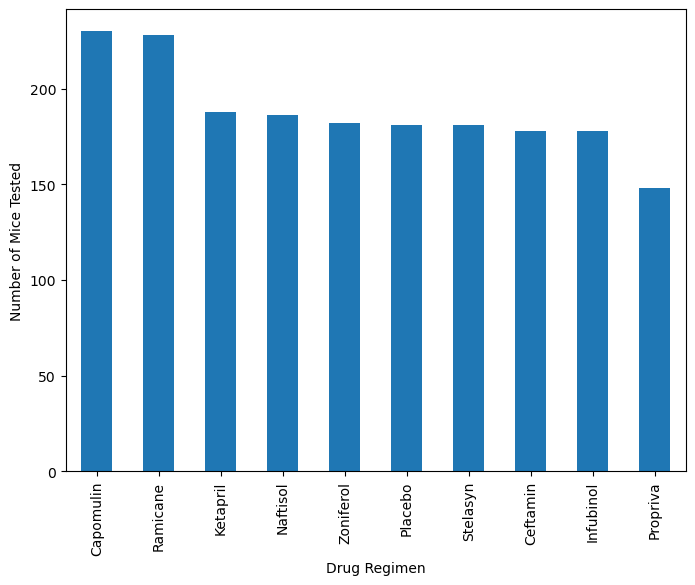

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
mice_timepoint = combined_data[["Drug Regimen","Timepoint"]]
drug_type = mice_timepoint.groupby('Drug Regimen')

# Count No of Timepoint for each Drug Regimen and Sort in Descending Order
count_timepoints = drug_type['Drug Regimen'].count().sort_values(ascending=False)

# Create a bar chart based off of the group series from before
bar_chart = count_timepoints.plot(kind='bar', figsize=(8,6))

# Set the xlabel and ylabel using class methods
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Mice Tested")

plt.show()



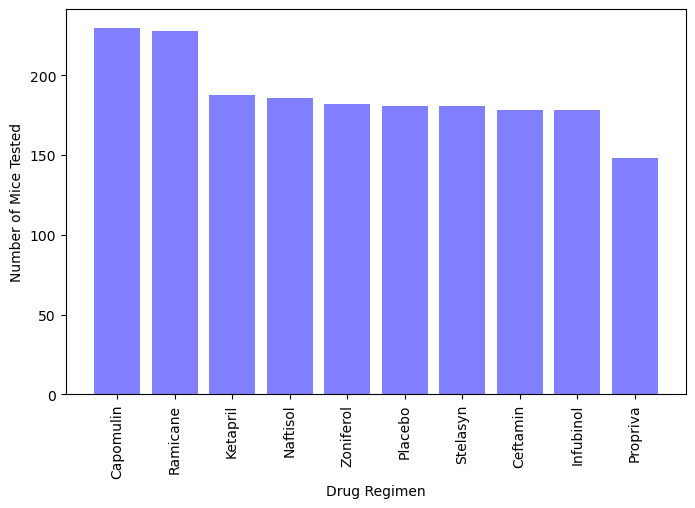

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(drug_type['Drug Regimen']))
tick_locations = [value for value in x_axis]
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(8,5))
plt.bar(x_axis, count_timepoints, color='blue', alpha=0.5, align="center")
plt.xticks(tick_locations, count_timepoints.index, rotation="vertical")
# Set a labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


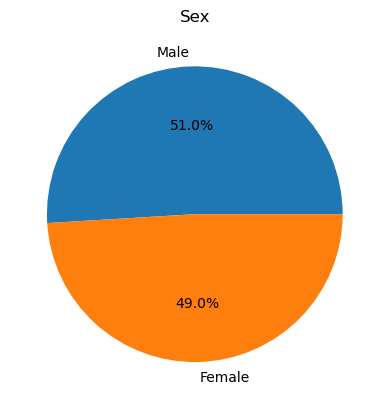

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Filter the DataFrame down only to those columns to chart
male_female = combined_data[["Sex"]]
sex_type = male_female.groupby("Sex")
sex_count = sex_type.value_counts().sort_values(ascending=False)

# Create a bar chart based off of the group series from before
pie_chart = sex_count.plot.pie(autopct='%1.1f%%')
pie_chart.set_title("Sex")
plt.show()

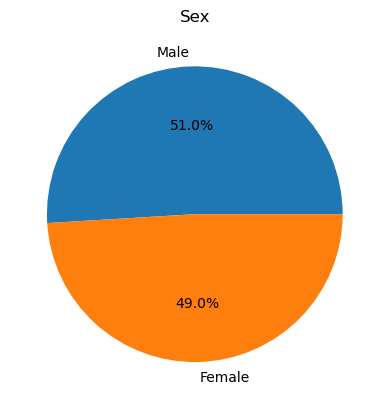

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count,autopct="%1.1f%%",labels=["Male" , "Female"])
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finaltumor_df = combined_data[["Mouse ID", "Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
finaltumor_4drug_grp = finaltumor_df.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = finaltumor_4drug_grp["Timepoint"].max()
last_timepoint_df = pd.DataFrame({"Final Timepoint" : max_timepoint})
last_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = combined_data.merge(last_timepoint_df,how="outer",on=["Mouse ID"])

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_data = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] 

for treatments in treatments_data:
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    final_tumor_vol = merged_df.loc[(merged_df["Drug Regimen"] == treatments)]
    # add subset 
    tumor_vol_data_df = final_tumor_vol[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint","Final Timepoint"]]
    tumor_vol_data_grouped = tumor_vol_data_df.groupby(["Mouse ID"])
    final_tumor_vol1 = tumor_vol_data_grouped["Tumor Volume (mm3)"].last()
    
    tumor_vol_data.append(final_tumor_vol1)
    
    # Determine outliers using upper and lower bounds
     
    quartiles = final_tumor_vol1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    final_tumor_data_df = tumor_vol_data_df.loc[(tumor_vol_data_df["Tumor Volume (mm3)"] > upper_bound) | (tumor_vol_data_df["Tumor Volume (mm3)"] < lower_bound)]

    print(f"{treatments}'s potential outliers: {final_tumor_data_df['Tumor Volume (mm3)']} ")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64 
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64) 


/var/folders/yw/zphshm411rd_wwltgd70q5040000gn/T/ipykernel_23452/3669080985.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments_data)


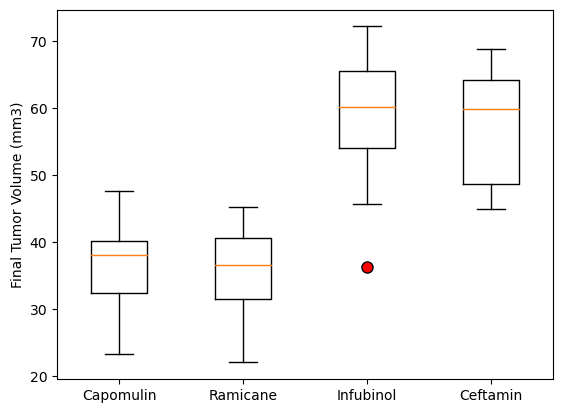

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments_data)
ax1.boxplot(tumor_vol_data,flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'red'})
plt.show()


## Line and Scatter Plots

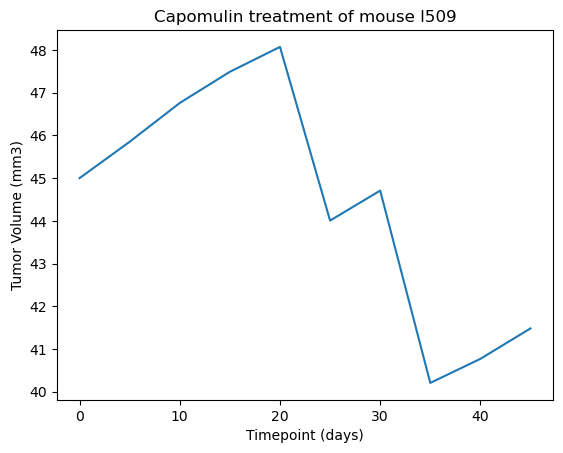

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vol_capomulin = merged_df.loc[((merged_df["Drug Regimen"] == "Capomulin") & (merged_df["Mouse ID"] == "l509"))]
tumor_vol_capomulin_df = tumor_vol_capomulin[["Mouse ID","Tumor Volume (mm3)","Timepoint"]]

x_axis_line = tumor_vol_capomulin_df["Timepoint"]

y_axis_line = tumor_vol_capomulin_df["Tumor Volume (mm3)"]

plt.plot(x_axis_line,y_axis_line)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()


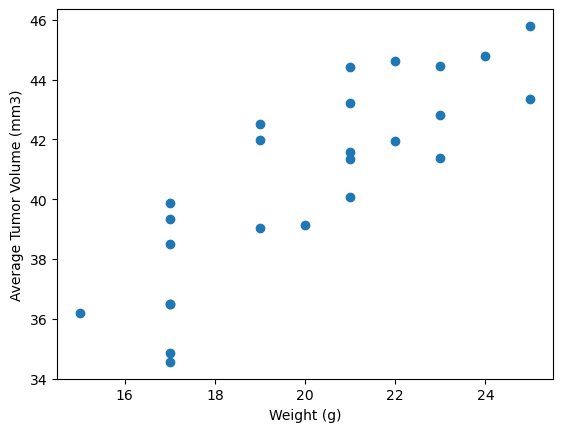

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_wgt_capomulin = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin")]
tumor_wgt_capomulin_grp = tumor_wgt_capomulin.groupby("Mouse ID")
avg_tumor_vol = tumor_wgt_capomulin_grp["Tumor Volume (mm3)"].mean()

mouse_wgt = tumor_wgt_capomulin_grp["Weight (g)"].first()

plt.scatter(mouse_wgt,avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


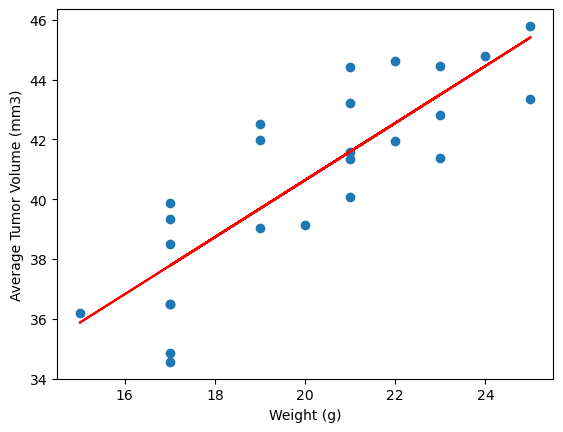

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Add the linear regression equation and line to plot
x_values = mouse_wgt
y_values = avg_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()
